# Aliasing - Don't Use Round Numbers in Simulations

Not required for MECH 217, but interesting.

When your sampling winds up in alignment with a frequency in the solution weird things can happen because you are always sampling at the same point in the cycle.

When your sampling rate is lower than a significant frequency in the system, you will keep getting weird things, even if they don't line up.

The weird things may not be obvious if they are happening at high enough frequencies.

The highest frequency you can resolve in your simulation is $1/2\Delta t$, the Nyquist frequency. This is exactly the same effect that shows up if you sample a real signal too slowly!



Import the usual collection of libraries

In [82]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

## Create some data to analyze



-0.0253715933954


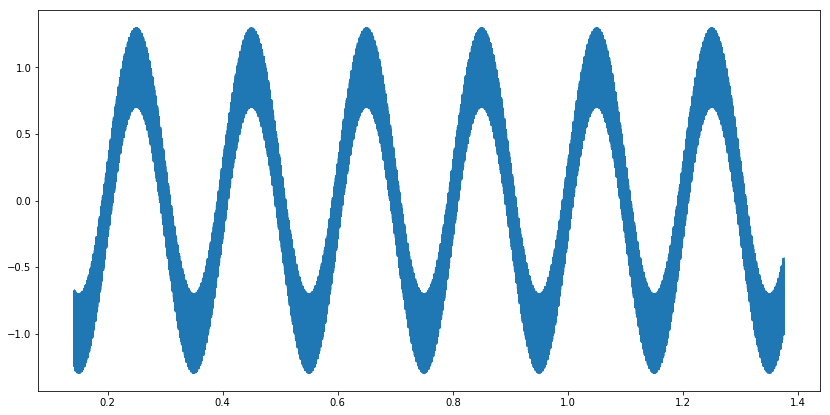

In [83]:
def getA(f1=5,f2=123456,Pstart = pi-3,P = 1.234,dt = .0001):
    # Period / dt gives number of steps, plus 1 for start and end
    # plus 0.1 to round up to get number of samples in the time series
    # then integer conversion so it can be an array index
    n = int(P/dt+1.1)       
    t = linspace(Pstart,Pstart+P,n)     # a time scale with n points

    A = sin(t*f1*2.0*pi)         # a real signal from f1, mean of zero
    A += 0.3 * sin(t*f2*2.0*pi)  # high frequency noise from f2, mean of zero
    return (t,A)

t,a = getA()
print(mean(a))
plot(t,a)

-0.271995845484


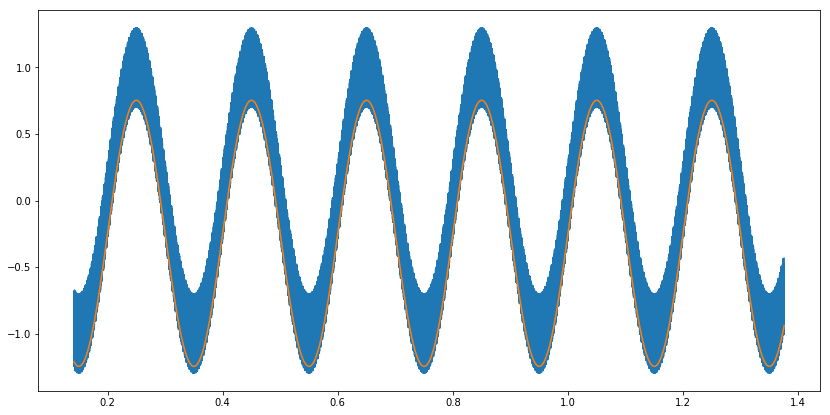

In [84]:
t1,a1 = getA(f2 = 1000000)
print(mean(a1))
plot(t,a)
plot(t1,a1)

0.0134025562502
-0.013402556247


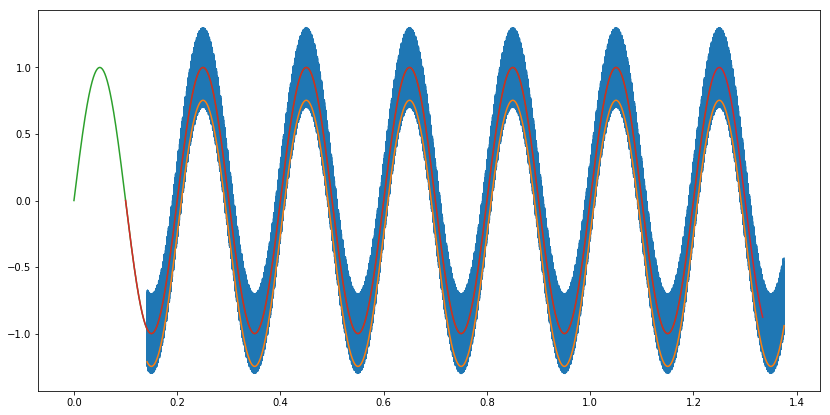

In [85]:
t2,a2 = getA(f2 = 100000,Pstart=0)
print(mean(a2))
t3,a3 = getA(f2 = 100000,Pstart=.1)
print(mean(a3))
plot(t,a)
plot(t1,a1)
plot(t2,a2)
plot(t3,a3)


0.0144038126243


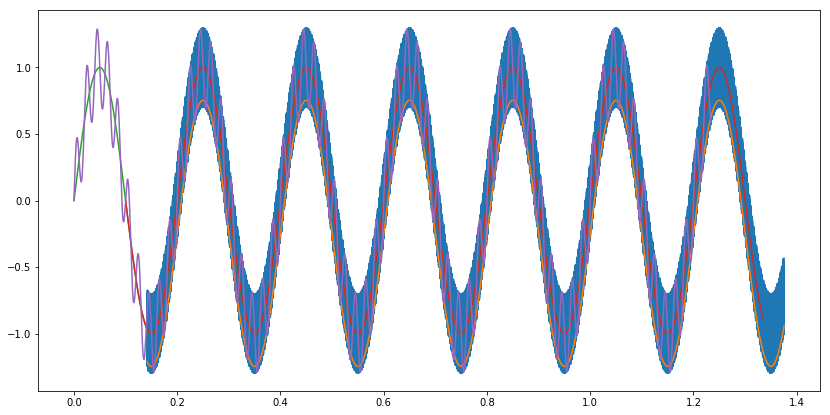

In [86]:
t4,a4 = getA(f2 = 100050,Pstart=0)
print(mean(a4))
plot(t,a)
plot(t1,a1)
plot(t2,a2)
plot(t3,a3)
plot(t4,a4)


## High frequency isn't high enough!
Even the first sample we simulated, the one that looked right with the high frequency noise superimposed on the low frequency signal, doesn't have frequency characteristics that match the noise we applied! It may not matter in some simulations, but don't get complacent.

We didn't set our delta t small enough to capture the noise frequency, so it aliased down to a frequency lower $1/2\Delta t$.

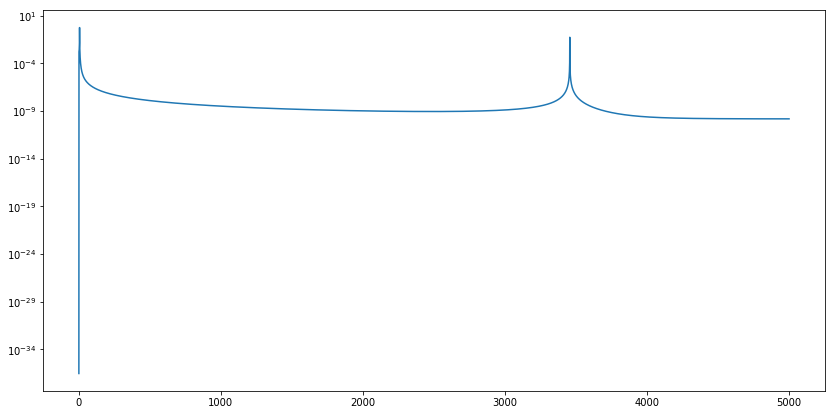

In [98]:
from scipy.signal import periodogram
f,p = periodogram(a,1/(t[1]-t[0]))
semilogy(f,p)

(0.5, 0.502)

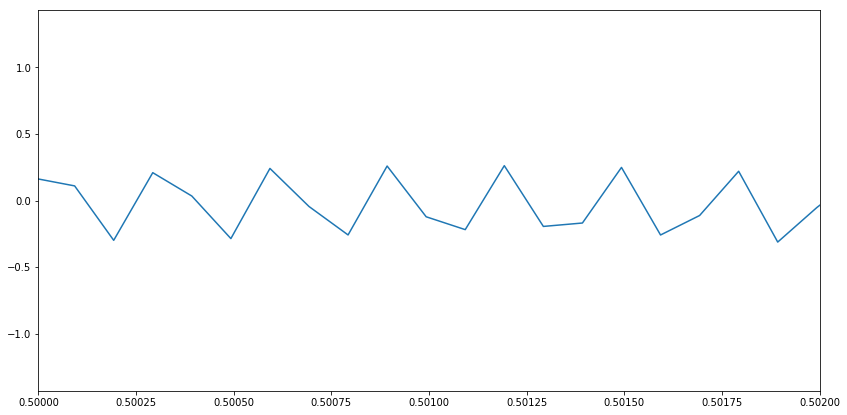

In [97]:
plot(t,a)
xlim(0.5,0.502)